Optimal threshold 159


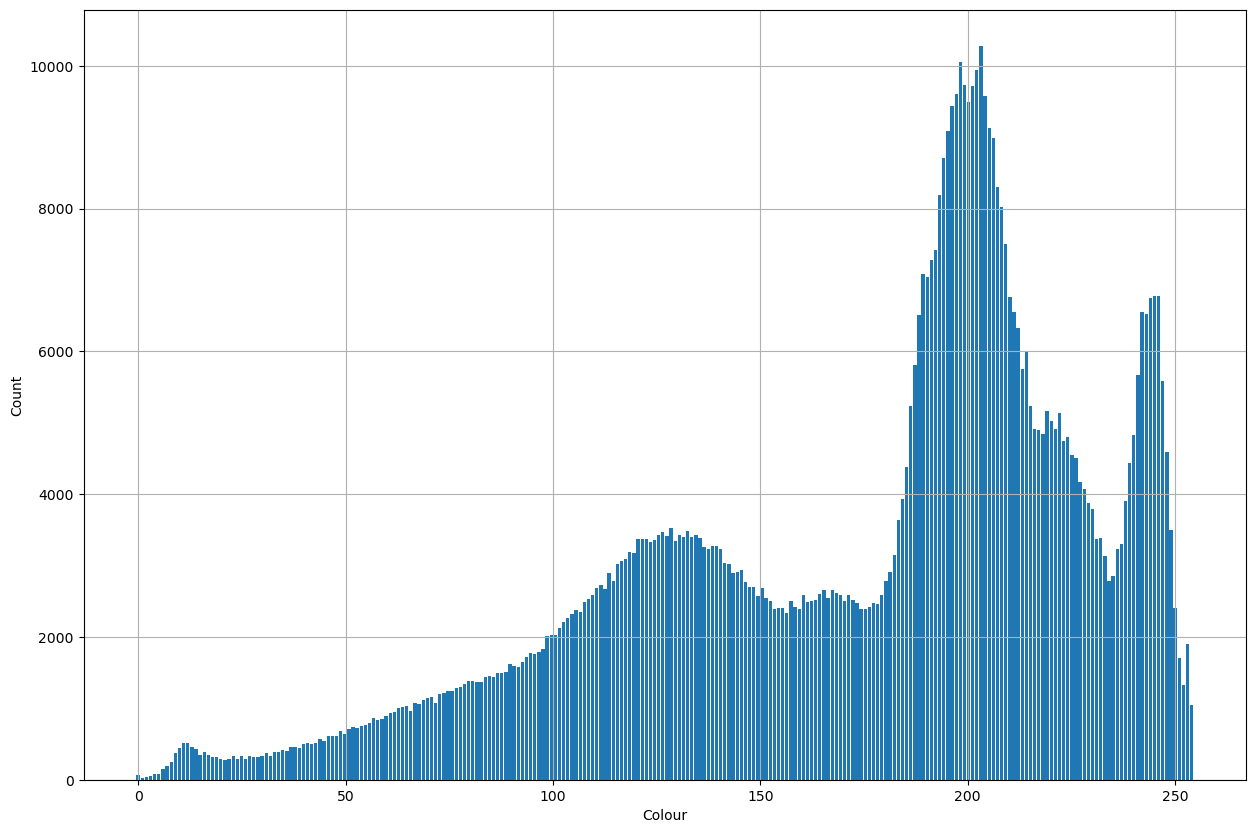

In [16]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

img = cv2.imread('/home/hask/Project/cv_homework/lesson8/data/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(img, cmap='gray')

h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

# Get image dimensions
rows, cols = img.shape

# Compute the total amount of image pixels
num_pixels = rows * cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Extract the image pixels corresponding to the foreground and background
    foreground = img[img > th]
    background = img[img <= th]
    
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = len(foreground) / num_pixels
    omega_b = len(background) / num_pixels
    
    # Compute pixel variance for foreground and background
    sigma2_f = np.var(foreground)
    sigma2_b = np.var(background)
    
    # Compute the within-class variance
    wcv = omega_f * sigma2_f + omega_b * sigma2_b
    
    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th

# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)


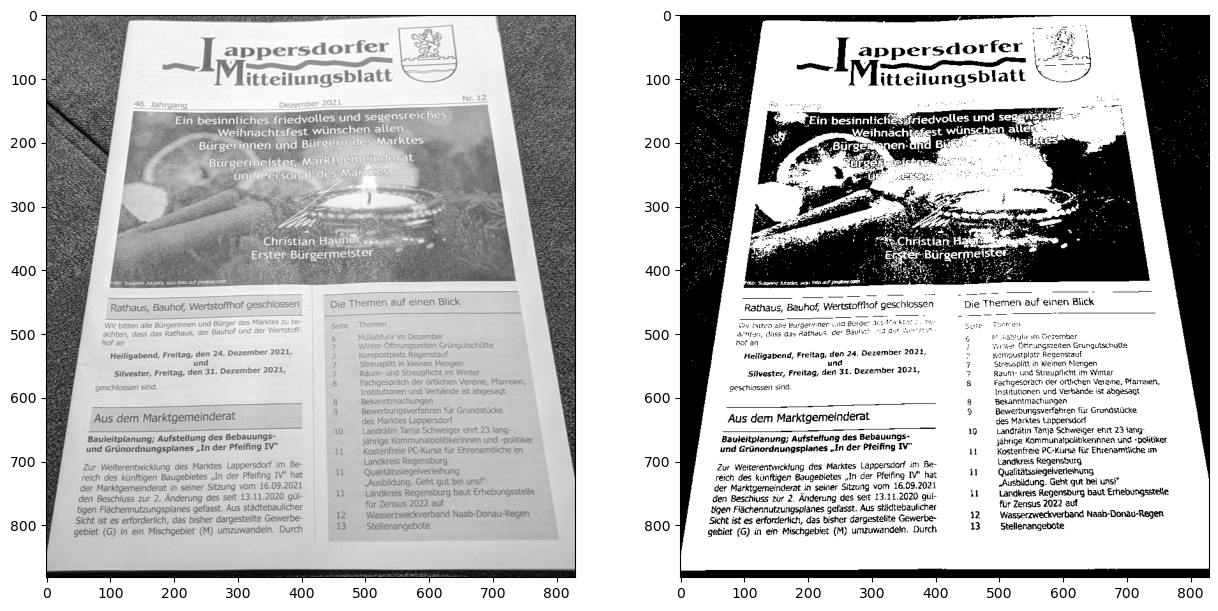

In [15]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')
plt.show()